<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Khislat_Zhuraeva_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689] 
#calculate mean 
total = sum(sales)
mean_sales = total / len(sales)
mean_sales

3052.714285714286

In [0]:
import numpy as np
import pandas as pd
import math


In [0]:
#calculate variance: ((number - mean)^2)/total
#function to subtract mean from each number
def subtract_mean(number):
  return number-mean_sales

#we can also convert it to a lambda function for effiency
lambda x: x-mean_sales

<function __main__.<lambda>>

In [0]:
#use 'map' to apply that function to our list
distances = list(map(subtract_mean, sales))
distances 

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [0]:
#square and sum all of those distances 
squared_distances = list(map(lambda x: x**2, distances))
numerator = sum(squared_distances)
numerator

1286327.4285714284

In [0]:
#how long is our list?
#for a sample taken from a population 
list_length_sample = len(squared_distances) - 1 # doof
#for a whole population (no sample)
list_length_pop = len(squared_distances)

In [0]:
#calculate the variance of a sample. variance is a measure of the spread. Average squared distance from the mean 
variance_sales_sample = numerator / list_length_sample
variance_sales_sample 
print('{:.1f}'.format(variance_sales_sample))

214387.9


In [0]:
#calculate the variance of the population. Average squared distance from the mean 
variance_sales_pop = numerator / list_length_pop
variance_sales_pop
print('{:.1f}'.format(variance_sales_pop))

183761.1


In [0]:
#calculate the standard deviation. Average distance from the mean 
std_dev_sample_math = '{:.1f}'.format(math.sqrt(variance_sales_sample))
std_dev_sample_np = '{:.1f}'.format(np.sqrt(variance_sales_sample))
std_dev_pop_math = '{:.1f}'.format(math.sqrt(variance_sales_pop))
std_dev_pop_np = '{:.1f}'.format(np.sqrt(variance_sales_pop))
print(std_dev_sample_math)
print(std_dev_sample_np)
print(std_dev_pop_math)
print(std_dev_pop_np)

463.0
463.0
428.7
428.7


In [0]:
#check our work with numpy
print('{:.1f}'.format(np.mean(sales)))
print('{:.1f}'.format(np.var(sales)))
print('{:.1f}'.format(np.std(sales)))

3052.7
183761.1
428.7


In [0]:
#check our work with pandas for population 
sales_df = pd.DataFrame({'sales':sales})
print('mean:', '{:.1f}'.format(sales_df['sales'].mean()))
print('variance: ', '{:.1f}'.format(sales_df['sales'].var(ddof=0)))
print('standard deviation: ','{:.1f}'.format(sales_df['sales'].std(ddof=0)))

mean: 3052.7
variance:  183761.1
standard deviation:  428.7


In [0]:
#check our work with pandas for a sample
sales_df = pd.DataFrame({'sales':sales})
print('mean:', '{:.1f}'.format(sales_df['sales'].mean()))
print('variance: ', '{:.1f}'.format(sales_df['sales'].var(ddof=1)))
print('standard deviation: ','{:.1f}'.format(sales_df['sales'].std(ddof=1)))

mean: 3052.7
variance:  214387.9
standard deviation:  463.0


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689] 
number_of_customers  = [127, 80, 105, 92, 120, 115, 93]
np.cov(sales, number_of_customers) #calculating covariance using numpy

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [0]:
#we can only choose the covariance 
np.cov(sales, number_of_customers)[0][1]

7604.357142857142

In [0]:
#To use PANDAS we have to convert it into a dataframe 
#adding an additional column to a sales_df 
sales_df['number_of_customers'] = pd.Series(number_of_customers)
sales_df

,sales,number_of_customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
#calculating covariance using pandas
sales_df.cov() #7604 is a COVARIANCE between number of customers and sales, it is repeated along the diagonal because COVARIANCE of sales to number of customers 
# is the same as COVARIANCE of number of customers to sales 
#213487 is a VARIANCE of sales and 290 is a VARIANCE of number of customers (those are unique values)

,sales,number_of_customers
sales,214387.904762,7604.357143
number_of_customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

### To find Correlation coefficient we have to divide our covariance values by the product of the standard deviation of the variables 
### #cor coefficient = cov / (std_value1*std_value2)
### #Correlation coefficient ranges from -1 to +1 with 0 representing no linear relationship between the data

***COVARIANCE  can take on practically any number while a CORRELATION is limited: -1 to +1
***Because of its numeric limitations, CORRELATION is more useful for determining how strong the relationship is between the two variables 
*** CORRELAION does not have units. COVARIANCE always has units
***CORRELATION is not affected by changes in the center(i.e. mean) or scale of the variables

In [0]:
# r  = cov(X,Y) / std_X * std_Y
#Calculate the standard deviation of both lists lists using pandas
std_customers = ((sales_df['number_of_customers'].std(ddof=1)))
print(std_customers)
std_sales = ((sales_df['sales'].std(ddof=1)))
print(std_sales)

17.057326313123664
463.0204150595357


In [0]:
#calculate covariance using pandas 
cov_sales_customers = sales_df['sales'].cov(sales_df['number_of_customers'])
cov_sales_customers

7604.357142857142

In [0]:
#calculating the denominator
denominator = std_sales*std_customers
denominator

7897.890309308459

In [0]:
#calculating the correlation 
corr_sales_customers = cov_sales_customers / denominator 
corr_sales_customers
#since there is a positive correaltion it means there is a 96% of corrlation between sales and number of customers 
#the slope goes from lower left to the upper left 

0.9628339778148909

In [0]:
#now we can check our work using pandas built in function 
sales_df['number_of_customers'].corr(sales_df['sales'])
#since there is a POSITIVE correaltion it means there is a 96% of corrlation between sales and number of customers 
#the slope goes from lower left to the upper left. The more customers we have the higher sales are  

0.9628339778148909

In [0]:
#There is a shorter way to do it
sales_df.corr()
#Because there is a perfect correlation between itself (sales with sales and number of customers with number of customers), the corr is 1.
#the corr between sales and number of customers is 0.96

,sales,number_of_customers
sales,1.000000,0.962834
number_of_customers,0.962834,1.000000



## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#calculate the covariance of the entire dataset
titanic_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#calculate the correlation of the entire dataset 
titanic_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


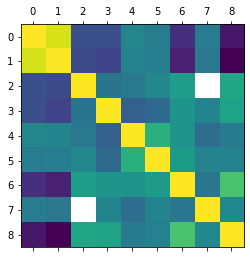

In [0]:
import matplotlib.pyplot as plt
plt.matshow(titanic_df.corr())
plt.show()

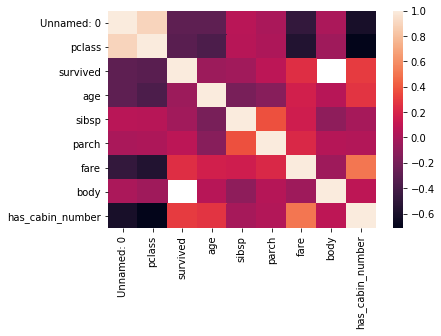

In [0]:
#seaborn code for the same 
import seaborn as sns
sns.heatmap(titanic_df.corr());
#nagative correlations are darker 


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
#orthogonality happens when two vectors are perpendicular to one another. 
#Two vectors are orthogonal when their dot product is 0
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
#choose some vectors 
vector1 = np.array([2, -3])
vector2 = np.array([-3, -2])

In [0]:
np.dot(vector1, vector2) #vectors are orthogonal because their dot product of these vector cancels out  or is equal to 0

0

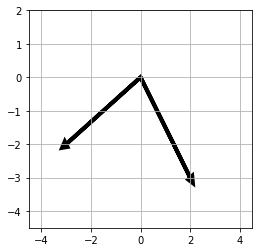

In [0]:
# Plotting the vectors 

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 2)

for vect in [vector1, vector2]:
  plt.arrow(0,0,vect[0], vect[1], head_width=0.2, head_length=0.2, linewidth=4)
plt.show()

In [0]:
#an example to convert non-orthogonal variables to orthogonal 
# create random vectors 
k = np.random.randn(2) # two dimensional vectors
x = np.random.randn(2) # two dimensional vectors
print(k,x)
print(np.dot(k,x))

[-1.50997825 -0.6544687 ] [-0.44645472  0.05922566]
0.6353755723974106


In [0]:
#to make it orthogonal:
x = x - (x.dot(k)*k/np.linalg.norm(k)**2)
x
#new array x should be orthogonal to k 

array([-0.09221746,  0.21276244])

In [0]:
np.dot(x,k)
print('{:.1f}'.format(np.dot(x,k)))
#now it is orthogonal 

-0.0


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6,-8,2])
np.dot(a,b)
#vectors a and b are not orthogonal because their dot product is not 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])
c

array([  2, -15,   6,  20])

In [0]:
#what is ||c||**2
c_length = np.linalg.norm(c)
c_length**2 

665.0

In [0]:
#What is  𝑐⋅𝑐 ?
c_dot_product = np.dot(c, c)
c_dot_product #dot product results in a scalar

665

In [0]:
#What is  𝑐𝑇𝑐 ?
c_transpose = c.T
c_transpose
np.dot(c_transpose, c)


665

In [0]:
#They all produce the same result: norm, dot product of a vector with itself, and the dot product of a vector with its transpose version

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
# a unit vector is any vector whose length or norm is equal to 1
d = np.array([7,12])
e = np.array([2,11,-8])
print(d, '\n', e)

[ 7 12] 
 [ 2 11 -8]


In [0]:
#calculating the length/norm of d and e 
d_norm = round(np.linalg.norm(d))
e_norm = round(np.linalg.norm(e))
print(d_norm, '\n', e_norm)



14.0 
 14.0


 \begin{align}
 d  = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7 \hat{i} + 12 \hat{j}
\end{align}

 \begin{align}
 e = 2\begin{bmatrix} 1 \\ 0 \\  0 \end{bmatrix} + 11\begin{bmatrix} 0 \\1 \\ 0  \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i}+11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
f

array([ 4, 12, 11,  9,  2])

In [0]:
f_norm = np.linalg.norm(f)
f_norm
# it is not a unit vector because its length is not 1. but we can turn it into a unit vector. But it has a corresponding unit vector that points the same direction 

19.131126469708992

In [0]:
#find the unit vector 
f_hat = f / f_norm
f_hat


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
#now we check f hat's norm to make sure that its length equal to 1 and it is a unit vector 
f_hat_norm = round(np.linalg.norm(f_hat)) 
f_hat_norm

1.0

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
#linearly dependent. Lie on the same line as each other. To create linearly deepndent vectors, we create vector 1 and then scale it 
vector_1 = [0.5, 1.2]
vector_2 = np.multiply(vector_1, 3)
print(vector_1, '\n', vector_2)


[0.5, 1.2] 
 [1.5 3.6]


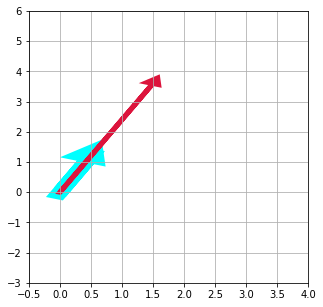

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-0.5, 4)
plt.ylim(-3,6)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=0.2,
            head_length=0.2,
            linewidth=width,
            color=mycolor)

In [0]:
#linearly independent. They don't lie on the same line as each other
vector_3 = np.random.randint(low=-3, high=3, size=2)
vector_4 = np.random.randint(low=-3, high=3, size=2)
print(vector_3, '\n', vector_4)

[-1 -3] 
 [-1  1]


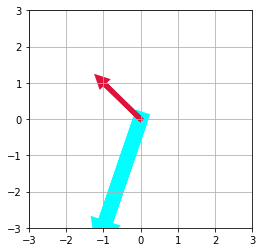

In [0]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors
for myvect, mycolor, width in [(vector_3, 'cyan', 15), (vector_4, 'crimson', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])
print(g, '\n', h)


[1 2] 
 [4 8]


In [0]:
#This is one possible linear combination
a, b = (3,5)
linear_combo = np.multiply(g,a)+ np.multiply(h,b)
print(linear_combo)

[23 46]


In [0]:
#This is the set of linear combinations:
many_combos = []
for (a,b) in [(1,2), (2,3), (4,5)]:
  linear_combo = np.multiply(g, a) + np.multiply(h, b)
  many_combos.append(linear_combo)
print(many_combos )

[array([ 9, 18]), array([14, 28]), array([24, 48])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

In [0]:
#This is one possible linear combination
a, b, c = (6,5,7)
linear_combo1 = np.multiply(l,a)+ np.multiply(m,b) + np.multiply(n, c)
print(linear_combo1)

[29 68 67]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# Creating 2 orthogonal vectors 
vect1 = np.array([3, 1])
vect2 = np.array([-3, 1])

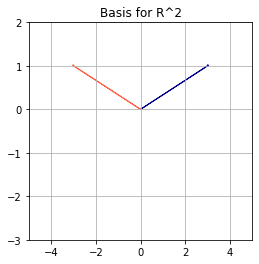

In [0]:
#Graphing Basis vectors in 2 d 
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.arrow(0,0, vect1[0], vect1[1], head_width=0.05, head_length=0.05, color='darkblue')
plt.arrow(0,0,vect2[0], vect1[1], head_length=0.05, head_width=0.05, color = 'tomato')
plt.xlim(-5,5)
plt.ylim(-3,2)
plt.title('Basis for R^2')
plt.show()


## 6.2 What does it mean to form a basis?

We can reduce any set of vectors into a subset of linearly Independent Vectors. 
A subset of basis is Orthogonal basis - set of vectors that are linearly independent, span the vectors space and they are orthogonal to each other (dot product is 0). Orthonormal Basis vectors are the same but they also have a length of 1 (unit vectors). 
Orthonormal is the smallest subset of unit vectors (1,0) and (0,1).

Basis vectors are unti vectors that can be used to define dimensionality. For example, in two dimensions there are 2 basis vectors, in three dimensions there are 3 basis vectors etc. Basis vectors are always of length 1. 
The basis of a vector of a vector space V is the set of vectors that fill up (span) the vector space V meaning that all the vectors are there except for the ones that I linearly dependent. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [0]:
#calculate the Rank of P
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank is reducing a matrix to its simplest form by removing all the linearly dependent vectors from the matrix. We use Gaussian elimination to reduce a matrix to its simplest form (R^2 or R^3) where the first row start with 1, second 0, and third row is all 0s. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

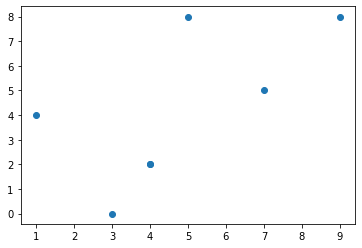

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()